<a href="https://colab.research.google.com/github/BorysZhyhalo/All-Python-codes-of-ZTM-course-by-Andrei-Neagoie/blob/master/Copy_of_Lesson3_pandas_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In [ ]:
import numpy as np
import pandas as pd

## Series

### Series from ndarray

In [ ]:
array_data = np.array([1, 2, 3, 4, 5])
series_from_array = pd.Series(data=array_data, index=["a", "b", "c", "d", "e"])
series_from_array

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
pd.Series(data=array_data)

0    1
1    2
2    3
3    4
4    5
dtype: int64

### Series from dict

In [ ]:
dict_data = {"a": 1, "b": 2, "c": 3, "d": 4, "e": 5}
series_from_dict = pd.Series(dict_data)
series_from_dict

a    1
b    2
c    3
d    4
e    5
dtype: int64

#### Series is ndarray-like:

In [ ]:
series_from_array.values

array([1, 2, 3, 4, 5])

In [ ]:
series_from_dict.values

array([1, 2, 3, 4, 5])

So, you can use most of the Numpy functions with Series object!

In [ ]:
np.mean(series_from_array), np.max(series_from_array)

(3.0, 5)

In [ ]:
series_from_array * 2

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [ ]:
series_from_array[0]

1

In [ ]:
series_from_array[:3]

a    1
b    2
c    3
dtype: int64

In [ ]:
# to actual array
series_from_array.to_numpy()

array([1, 2, 3, 4, 5])

#### Series is dict-like

In [ ]:
series_from_array["a"]

1

In [ ]:
series_from_array["a"] = 11
series_from_array

a    11
b     2
c     3
d     4
e     5
dtype: int64

In [ ]:
"a" in series_from_array

True

In [ ]:
"aa" in series_from_array

False

In [ ]:
series_from_array["aa"]

KeyError: ignored

In [ ]:
series_from_array.to_dict()

{'a': 11, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

#### Play more with series

In [ ]:
series_from_dict

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
series_from_dict > 3

a    False
b    False
c    False
d     True
e     True
dtype: bool

In [ ]:
series_from_dict[series_from_dict > 3]

d    4
e    5
dtype: int64

In [ ]:
series_from_dict.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [ ]:
series_from_dict["aa"] = np.nan
series_from_dict

a     1.0
b     2.0
c     3.0
d     4.0
e     5.0
aa    NaN
dtype: float64

In [ ]:
series_from_dict.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [ ]:
series_from_dict.isna()

a     False
b     False
c     False
d     False
e     False
aa     True
dtype: bool

In [ ]:
series_from_dict.fillna(series_from_dict.median())

a     1.0
b     2.0
c     3.0
d     4.0
e     5.0
aa    3.0
dtype: float64

In [ ]:
for el in series_from_dict:
  print(el)

1.0
2.0
3.0
4.0
5.0
nan


## DataFrame

### Create DataFrane

In [ ]:
#from dict of ndarrays or lists
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [ ]:
#from list of dict
d2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(d2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20210102"),
        "C": pd.Series(1, index=list(range(4,8)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32", ),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
        "G": [[3,4]]*4
    }
)
df

,A,B,C,D,E,F,G
4,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
5,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"
6,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]"
7,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]"


### DataFrame characteristics

In [ ]:
df.index

Int64Index([4, 5, 6, 7], dtype='int64')

In [ ]:
df.index = [1, 2, 3, 4]

In [ ]:
df.index

Int64Index([1, 2, 3, 4], dtype='int64')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [ ]:
df.size

28

In [ ]:
df.shape

(4, 7)

In [ ]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G            object
dtype: object

In [ ]:
df.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [ ]:
df["E"]

1     test
2    train
3     test
4    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [ ]:
df.E

1     test
2    train
3     test
4    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [ ]:
df[["E"]]

,E
1,test
2,train
3,test
4,train


In [ ]:
df[["A", "E"]]

,A,E
1,1.0,test
2,1.0,train
3,1.0,test
4,1.0,train


In [ ]:
df.to_numpy()

array([[1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'test', 'foo',
        list([3, 4])],
       [1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'train', 'foo',
        list([3, 4])],
       [1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'test', 'foo',
        list([3, 4])],
       [1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'train', 'foo',
        list([3, 4])]], dtype=object)

### Operations on columns

In [ ]:
df["A"] + df["C"]

1    2.0
2    2.0
3    2.0
4    2.0
dtype: float64

In [ ]:
df["D"] ** 2

1    9
2    9
3    9
4    9
Name: D, dtype: int32

In [ ]:
df["New_col"] = 1
df

,A,B,C,D,E,F,G,New_col
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",1
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",1
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",1
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",1


In [ ]:
df["New_col"] = [1, 3]

ValueError: ignored

In [ ]:
df["New_col"] = [1, 2, 3, 4]
df

,A,B,C,D,E,F,G,New_col
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",1
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",2
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",3
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",4


####Do you remember abount index?

In [ ]:
series_from_array

a    11
b     2
c     3
d     4
e     5
dtype: int64

In [ ]:
df["New_col"] = series_from_array
df

,A,B,C,D,E,F,G,New_col
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",NaN
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",NaN
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",NaN
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",NaN


In [ ]:
series_from_array.index = [1, 2, 3, 4, 5]
series_from_array

1    11
2     2
3     3
4     4
5     5
dtype: int64

In [ ]:
df["New_col"] = series_from_array
df

,A,B,C,D,E,F,G,New_col
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",11
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",2
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",3
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",4


In [ ]:
df.rename(columns={"New_col": "X"})

,A,B,C,D,E,F,G,X
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",11
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",2
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",3
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",4


In [ ]:
df

,A,B,C,D,E,F,G,New_col
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",11
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",2
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",3
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",4


In [ ]:
#not recommended
df.rename(columns={"New_col": "X"}, inplace=True)
df

,A,B,C,D,E,F,G,X
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",11
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",2
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",3
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",4


Good article is [here](https://towardsdatascience.com/why-you-should-probably-never-use-pandas-inplace-true-9f9f211849e4)

In [ ]:
df = df.rename(columns={"New_col": "X"})
df

,A,B,C,D,E,F,G,X
1,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",11
2,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",2
3,1.0,2021-01-02,1.0,3,test,foo,"[3, 4]",3
4,1.0,2021-01-02,1.0,3,train,foo,"[3, 4]",4


### Indexing

In [ ]:
df.index

Int64Index([1, 2, 3, 4], dtype='int64')

In [ ]:
df[1]

KeyError: ignored

In [ ]:
df.loc[1]

In [ ]:
df["X"].loc[1], df.loc[1]["X"]

In [ ]:
df.loc[[1, 4]]

In [ ]:
#Purely integer-location based indexing for selection by position
df.iloc[[0, 3]]

In [ ]:
df.iloc[0]

In [ ]:
df[df.X > 3]

In [ ]:
df[(df.E == "train") & (df.X == 2)]

In [ ]:
df

In [ ]:
#Use at if you only need to get or set a single value in a DataFrame or Series
#df.at(index, column)
df.at[1, "X"] = 1
df

In [ ]:
df.G = 1
df

### More manipulations: apply

In [ ]:
df["X2_1"] = df["X"].apply(lambda x: x*2)
df

In [ ]:
def double_val(x):
    return x*2

In [ ]:
df["X2_2"] = df["X"].apply(lambda x: double_val(x))
df

In [ ]:
df["X2_3"] = df["X"].apply(double_val)
df

In [ ]:
df["X2_4"] = df["X"] * 2
df

Apply documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)


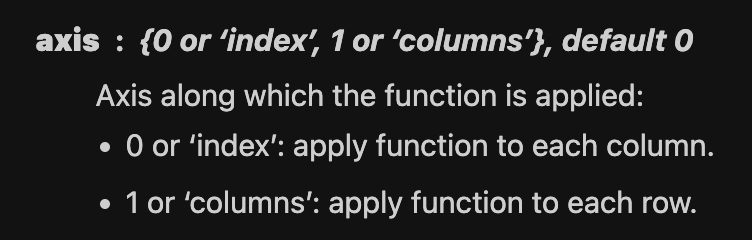

In [ ]:
df['CGX'] = df.apply(lambda x: (x['C'] + x['X']) / x['G'] if x['X'] > 2 else 0, axis=1)
df

### Removing of columns/rows

In [ ]:
a = df.drop(columns=['X2_1'], inplace=True)
df

In [ ]:
a

In [ ]:
df.drop(['B', 'C'], axis=1)

In [ ]:
df

In [ ]:
df.drop([1, 3], axis=0)

### Adding row to dataframe

In [ ]:
df.loc[6] = [2.1, pd.Timestamp("20230102"), 2.5, 4, "test", "bar", 5, 5, 10, 10, 10, 6]
df

There is an [append](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html) method. **But do not use it, it is depricated!**

As well you can use [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) for adding new row/rows

In [ ]:
df2 = pd.DataFrame([[2.1, pd.Timestamp("20230102"), 2.5, 4, "test", "bar", 5, 5, 10, 10, 10, 6]], columns = df.columns)
df2

In [ ]:
df

In [ ]:
df3 = pd.concat([df, df2])
df3

In [ ]:
df4 = pd.concat([df, df2], ignore_index=True)
df4

### Merging dataframes

In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K4"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on="key")
result

In [ ]:
pd.merge(left, right, on="key", how="inner")

In [ ]:
pd.merge(left, right, on="key", how="left")

In [ ]:
pd.merge(left, right, on="key", how="right")

In [ ]:
pd.merge(left, right, on="key", how="outer")

[Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html) article

### Save and read DataFrame to csv file

In [ ]:
df.to_csv('res_lecture_3.csv', sep=';')

In [ ]:
df2 = pd.read_csv('res_lecture_3.csv', sep=';')
df2

In [ ]:
df2 = pd.read_csv('res_lecture_3.csv', sep=';', index_col=0)
df2

In [2]:
import numpy as np
import pandas as pd

In [9]:
df = pd.DataFrame([[4, 9]] * 8, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9
3,4,9
4,4,9
5,4,9
6,4,9
7,4,9
